In [2]:
#图片压缩尺寸,并二值化

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [54]:
inputFile = 'original.jpg'
outputFile = 'adjust.jpg'
image = Image.open(inputFile)
converted_image = image.convert("L")

threshold = 100 #二值化的灰度分界线
table = []
for i in range(256):
    if i < threshold:
        table.append(0)
    else:
        table.append(1)

(x,y) = image.size
x_s = 47
y_s = 62
out = converted_image.point(table, '1') #写入
out = out.resize((x_s,y_s),Image.ANTIALIAS)
out.save(outputFile)

print('原始: ',x,y)
print('调整后: ',x_s,y_s)

原始:  251 335
调整后:  47 62


In [43]:
data = out.getdata()
data = np.array(data)

In [49]:
X = data.reshape(62,47)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
data

array([0, 0, 0, ..., 0, 0, 0])

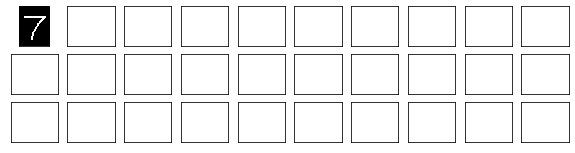

In [28]:
fig, ax = plt.subplots(3,10,figsize=(10,2.5),subplot_kw={"xticks":[],"yticks":[]})
ax[0,0].imshow(data.reshape(62,47),cmap="binary_r")

In [37]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.externals import joblib
from sklearn.decomposition import PCA
import pandas as pd

In [53]:
#施工中
#这一段的想法是用已经训练好的pca和rfc对新数据操作
X_dr = PCA(23).fit_transform(X) #这里不需要用到fit
rfc1 = joblib.load("rfc1.pkl") #使用保存的模型预测数字，如果还没有运行数字识别请先运行数字识别
prediction = rfc1.predict(X) #这里应该要用到transform
print(prediction)

ValueError: Number of features of the model must match the input. Model n_features is 23 and input n_features is 2914 